<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/polinomial_adam_temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# Кубический полином: y = a*x^3 + b*x^2 + c*x + d
def cubic_poly(x, coeffs):
    return coeffs[0]*x**3 + coeffs[1]*x**2 + coeffs[2]*x + coeffs[3]

# Функция потерь (MSE)
def loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Градиент функции потерь по коэффициентам
def gradient(x, y_true, y_pred, coeffs):
    error = y_pred - y_true
    grad_a = 2 * np.mean(error * x**3)
    grad_b = 2 * np.mean(error * x**2)
    grad_c = 2 * np.mean(error * x)
    grad_d = 2 * np.mean(error)
    return np.array([grad_a, grad_b, grad_c, grad_d])

# Оптимизатор Adam
class AdamOptimizer:
    def __init__(self, params, lr=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.params = params
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = np.zeros_like(params)
        self.v = np.zeros_like(params)
        self.t = 0

    def step(self, grad):
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * grad**2
        m_hat = self.m / (1 - self.beta1**self.t)
        v_hat = self.v / (1 - self.beta2**self.t)
        self.params -= self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)
        return self.params

# Обучение модели
def train(x, y, coeffs_init, epochs=1000, lr=0.01):
    coeffs = coeffs_init.copy()
    optimizer = AdamOptimizer(coeffs, lr=lr)

    for epoch in range(epochs):
        y_pred = cubic_poly(x, coeffs)
        current_loss = loss(y, y_pred)
        grad = gradient(x, y, y_pred, coeffs)
        coeffs = optimizer.step(grad)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {current_loss:.6f}")

    return coeffs

# Пример реальных данных: Температура воздуха в зависимости от времени суток (в часах)
# Данные могут демонстрировать нелинейную зависимость, подходящую для кубической аппроксимации
x_real = np.array([0, 3, 6, 9, 12, 15, 18, 21])  # Время (часы)
y_real = np.array([12, 10, 8, 15, 22, 24, 18, 14])  # Температура (°C)

# Нормализация данных (для лучшей сходимости)
x_normalized = (x_real - np.mean(x_real)) / np.std(x_real)
y_normalized = (y_real - np.mean(y_real)) / np.std(y_real)

# Инициализация коэффициентов случайными значениями
coeffs_init = np.random.randn(4)

# Обучение модели
final_coeffs = train(x_normalized, y_normalized, coeffs_init, epochs=1000, lr=0.1)

# Денормализация коэффициентов (если нужно вернуться к исходным единицам измерения)
# (Пропущена для краткости, но может быть добавлена при необходимости)

print("Final coefficients:", final_coeffs)

Epoch 0, Loss: 18.388101
Epoch 100, Loss: 0.119231
Epoch 200, Loss: 0.114422
Epoch 300, Loss: 0.114422
Epoch 400, Loss: 0.114422
Epoch 500, Loss: 0.114422
Epoch 600, Loss: 0.114422
Epoch 700, Loss: 0.114422
Epoch 800, Loss: 0.114422
Epoch 900, Loss: 0.114422
Final coefficients: [-0.91713169 -0.42130749  2.18046854  0.42130749]


Epoch 0, Loss: 19.696255
Epoch 100, Loss: 0.115481
Epoch 200, Loss: 0.114466
Epoch 300, Loss: 0.114424
Epoch 400, Loss: 0.114422
Epoch 500, Loss: 0.114422
Epoch 600, Loss: 0.114422
Epoch 700, Loss: 0.114422
Epoch 800, Loss: 0.114422
Epoch 900, Loss: 0.114422


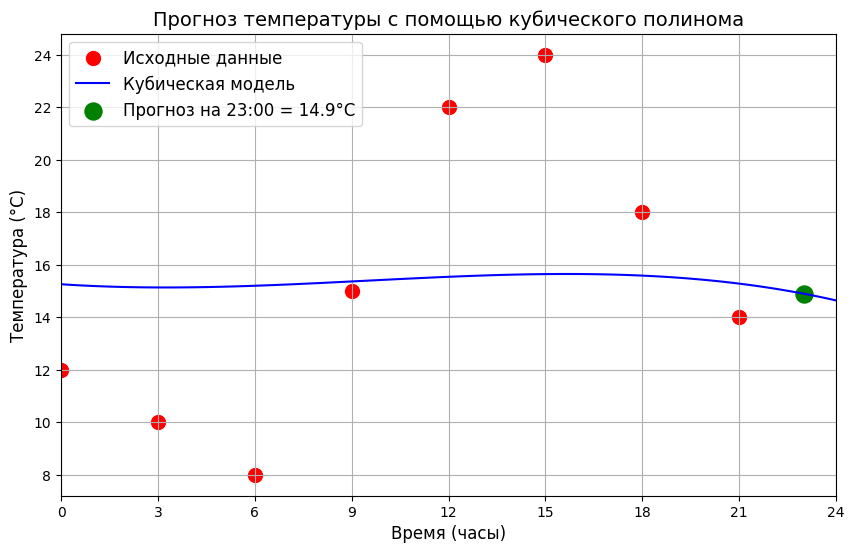

Итоговые коэффициенты полинома (денормализованные):
a = -0.000536, b = 0.015197, c = -0.081556, d = 15.256588

Прогноз температуры в 23:00 часов: 14.9°C


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Кубический полином: y = a*x^3 + b*x^2 + c*x + d
def cubic_poly(x, coeffs):
    return coeffs[0]*x**3 + coeffs[1]*x**2 + coeffs[2]*x + coeffs[3]

# Функция потерь (MSE)
def loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Градиент функции потерь по коэффициентам
def gradient(x, y_true, y_pred, coeffs):
    error = y_pred - y_true
    grad_a = 2 * np.mean(error * x**3)
    grad_b = 2 * np.mean(error * x**2)
    grad_c = 2 * np.mean(error * x)
    grad_d = 2 * np.mean(error)
    return np.array([grad_a, grad_b, grad_c, grad_d])

# Оптимизатор Adam
class AdamOptimizer:
    def __init__(self, params, lr=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.params = params
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = np.zeros_like(params)
        self.v = np.zeros_like(params)
        self.t = 0

    def step(self, grad):
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * grad**2
        m_hat = self.m / (1 - self.beta1**self.t)
        v_hat = self.v / (1 - self.beta2**self.t)
        self.params -= self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)
        return self.params

# Обучение модели
def train(x, y, coeffs_init, epochs=1000, lr=0.01):
    coeffs = coeffs_init.copy()
    optimizer = AdamOptimizer(coeffs, lr=lr)

    for epoch in range(epochs):
        y_pred = cubic_poly(x, coeffs)
        current_loss = loss(y, y_pred)
        grad = gradient(x, y, y_pred, coeffs)
        coeffs = optimizer.step(grad)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {current_loss:.6f}")

    return coeffs

# Исходные данные: Температура воздуха в зависимости от времени суток
hours = np.array([0, 3, 6, 9, 12, 15, 18, 21])  # Время (часы)
temperature = np.array([12, 10, 8, 15, 22, 24, 18, 14])  # Температура (°C)

# Нормализация данных
hours_mean, hours_std = hours.mean(), hours.std()
temp_mean, temp_std = temperature.mean(), temperature.std()

x_normalized = (hours - hours_mean) / hours_std
y_normalized = (temperature - temp_mean) / temp_std

# Инициализация и обучение
coeffs_init = np.random.randn(4)
final_coeffs_normalized = train(x_normalized, y_normalized, coeffs_init, epochs=1000, lr=0.1)

# Денормализация коэффициентов
a_norm, b_norm, c_norm, d_norm = final_coeffs_normalized
# Масштабируем коэффициенты для исходных единиц измерения
a = a_norm / (hours_std**3 * temp_std)
b = (b_norm - 3*a_norm*hours_mean/hours_std) / (hours_std**2 * temp_std)
c = (c_norm - 2*b_norm*hours_mean/hours_std + 3*a_norm*hours_mean**2/hours_std**2) / (hours_std * temp_std)
d = (d_norm - c_norm*hours_mean/hours_std + b_norm*hours_mean**2/hours_std**2 - a_norm*hours_mean**3/hours_std**3) / temp_std + temp_mean

final_coeffs = np.array([a, b, c, d])

# Визуализация исходных данных
plt.figure(figsize=(10, 6))
plt.scatter(hours, temperature, color='red', label='Исходные данные', s=100)

# Предсказание на новых временных точках
new_hours = np.linspace(0, 24, 100)  # Прогноз на полные сутки
predicted_temp = cubic_poly(new_hours, final_coeffs)

# Визуализация предсказания
plt.plot(new_hours, predicted_temp, 'b-', label='Кубическая модель')
plt.xlabel('Время (часы)', fontsize=12)
plt.ylabel('Температура (°C)', fontsize=12)
plt.title('Прогноз температуры с помощью кубического полинома', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(np.arange(0, 25, 3))
plt.xlim(0, 24)

# Прогноз температуры в конкретное новое время
new_time = 23  # 23:00 часа
predicted_new = cubic_poly(new_time, final_coeffs)
plt.scatter([new_time], [predicted_new], color='green', s=150, label=f'Прогноз на {new_time}:00 = {predicted_new:.1f}°C')

plt.legend(fontsize=12)
plt.show()

print("Итоговые коэффициенты полинома (денормализованные):")
print(f"a = {final_coeffs[0]:.6f}, b = {final_coeffs[1]:.6f}, c = {final_coeffs[2]:.6f}, d = {final_coeffs[3]:.6f}")
print(f"\nПрогноз температуры в {new_time}:00 часов: {predicted_new:.1f}°C")

Лучшая комбинация: ['x3', 'x2', 'x1', 'x0'], MSE: 0.114741


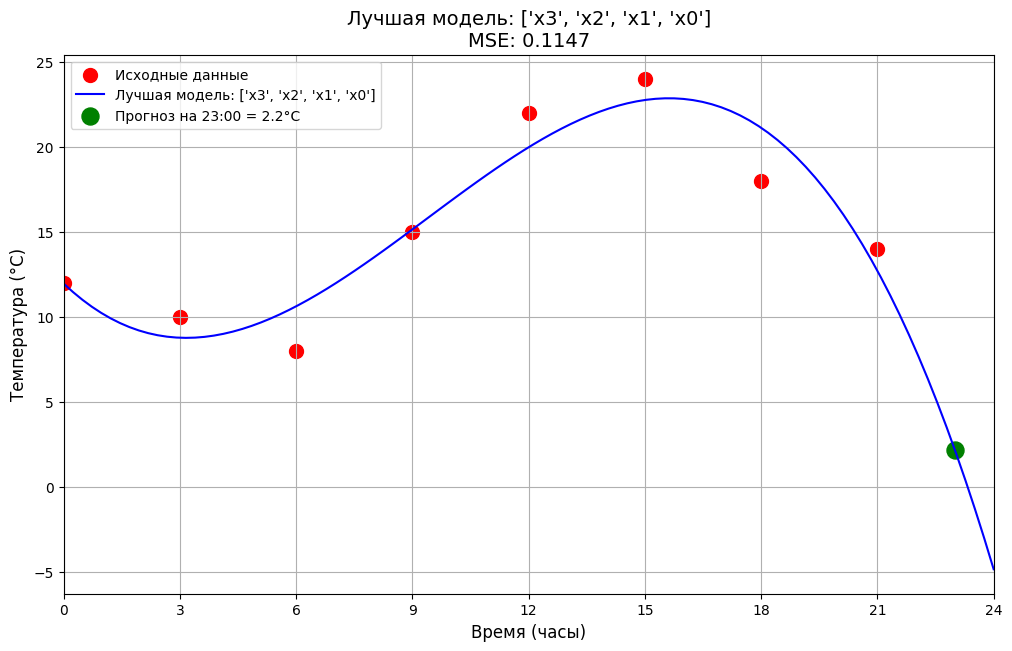


Коэффициенты лучшей модели:
x3: -0.8999
x2: -0.4345
x1: 2.1465
x0: 0.4391

Денормализованные коэффициенты:
x^3: -0.000526
x^2: -0.001746
x: 0.059296
Свободный член: 15.637331

Прогноз температуры в 23:00 часов: 2.2°C


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# Генерация всех возможных комбинаций членов полинома
def generate_poly_combinations():
    terms = ['x3', 'x2', 'x1', 'x0']  # x3 = x^3, x0 = свободный член
    all_combinations = []
    for r in range(1, 5):  # Все комбинации от 1 до 4 членов
        for combo in combinations(terms, r):
            all_combinations.append(list(combo))
    return all_combinations

# Полиномиальная модель с заданной комбинацией членов
def poly_model(x, coeffs, combo):
    y = np.zeros_like(x)
    for term, coef in zip(combo, coeffs):
        if term == 'x3':
            y += coef * x**3
        elif term == 'x2':
            y += coef * x**2
        elif term == 'x1':
            y += coef * x
        elif term == 'x0':
            y += coef
    return y

# Функция потерь (MSE)
def loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Оптимизатор Adam
class AdamOptimizer:
    def __init__(self, params, lr=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.params = params
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = np.zeros_like(params)
        self.v = np.zeros_like(params)
        self.t = 0

    def step(self, grad):
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * grad**2
        m_hat = self.m / (1 - self.beta1**self.t)
        v_hat = self.v / (1 - self.beta2**self.t)
        self.params -= self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)
        return self.params

# Обучение модели с заданной комбинацией членов
def train_model(x, y, combo, epochs=1000, lr=0.01):
    coeffs = np.random.randn(len(combo))
    optimizer = AdamOptimizer(coeffs, lr=lr)

    for epoch in range(epochs):
        y_pred = poly_model(x, coeffs, combo)
        grad = np.zeros_like(coeffs)
        error = y_pred - y

        for i, term in enumerate(combo):
            if term == 'x3':
                grad[i] = 2 * np.mean(error * x**3)
            elif term == 'x2':
                grad[i] = 2 * np.mean(error * x**2)
            elif term == 'x1':
                grad[i] = 2 * np.mean(error * x)
            elif term == 'x0':
                grad[i] = 2 * np.mean(error)

        coeffs = optimizer.step(grad)

    final_loss = loss(y, poly_model(x, coeffs, combo))
    return coeffs, final_loss

# Исходные данные
hours = np.array([0, 3, 6, 9, 12, 15, 18, 21])
temperature = np.array([12, 10, 8, 15, 22, 24, 18, 14])

# Нормализация
hours_mean, hours_std = hours.mean(), hours.std()
temp_mean, temp_std = temperature.mean(), temperature.std()
x_norm = (hours - hours_mean) / hours_std
y_norm = (temperature - temp_mean) / temp_std

# Перебор всех комбинаций и выбор лучшей
combinations = generate_poly_combinations()
best_loss = np.inf
best_combo = None
best_coeffs = None

for combo in combinations:
    coeffs, current_loss = train_model(x_norm, y_norm, combo)
    if current_loss < best_loss:
        best_loss = current_loss
        best_combo = combo
        best_coeffs = coeffs

print(f"Лучшая комбинация: {best_combo}, MSE: {best_loss:.6f}")

# Денормализация коэффициентов
def denormalize_coeffs(coeffs, combo):
    a = b = c = d = 0
    for term, coef in zip(combo, coeffs):
        if term == 'x3':
            a = coef / (hours_std**3 * temp_std)
        elif term == 'x2':
            b = coef / (hours_std**2 * temp_std)
        elif term == 'x1':
            c = coef / (hours_std * temp_std)
        elif term == 'x0':
            d = (coef - (a*hours_mean**3 + b*hours_mean**2 + c*hours_mean)*temp_std) / temp_std + temp_mean
    return a, b, c, d

a, b, c, d = denormalize_coeffs(best_coeffs, best_combo)

# Визуализация
plt.figure(figsize=(12, 7))
plt.scatter(hours, temperature, color='red', s=100, label='Исходные данные')

# Прогноз на новых данных
new_hours = np.linspace(0, 24, 100)
new_hours_norm = (new_hours - hours_mean) / hours_std
predicted_norm = poly_model(new_hours_norm, best_coeffs, best_combo)
predicted = predicted_norm * temp_std + temp_mean

plt.plot(new_hours, predicted, 'b-', label=f'Лучшая модель: {best_combo}')

# Прогноз в новой точке
new_time = 23
new_time_norm = (new_time - hours_mean) / hours_std
pred_new_norm = poly_model(new_time_norm, best_coeffs, best_combo)
pred_new = pred_new_norm * temp_std + temp_mean

plt.scatter([new_time], [pred_new], color='green', s=150,
            label=f'Прогноз на {new_time}:00 = {pred_new:.1f}°C')

plt.xlabel('Время (часы)', fontsize=12)
plt.ylabel('Температура (°C)', fontsize=12)
plt.title(f'Лучшая модель: {best_combo}\nMSE: {best_loss:.4f}', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.xticks(np.arange(0, 25, 3))
plt.xlim(0, 24)
plt.show()

print("\nКоэффициенты лучшей модели:")
for term, coef in zip(best_combo, best_coeffs):
    print(f"{term}: {coef:.4f}")

print("\nДенормализованные коэффициенты:")
if 'x3' in best_combo: print(f"x^3: {a:.6f}")
if 'x2' in best_combo: print(f"x^2: {b:.6f}")
if 'x1' in best_combo: print(f"x: {c:.6f}")
if 'x0' in best_combo: print(f"Свободный член: {d:.6f}")

print(f"\nПрогноз температуры в {new_time}:00 часов: {pred_new:.1f}°C")

Лучшая комбинация признаков: ('sin', 'cos', 'sin*cos', 'sin²', 'bias')
Лучший MSE: 0.006220
Прогноз температуры в 23:00: 12.7°C
Прогноз температуры в 5:00: 8.3°C


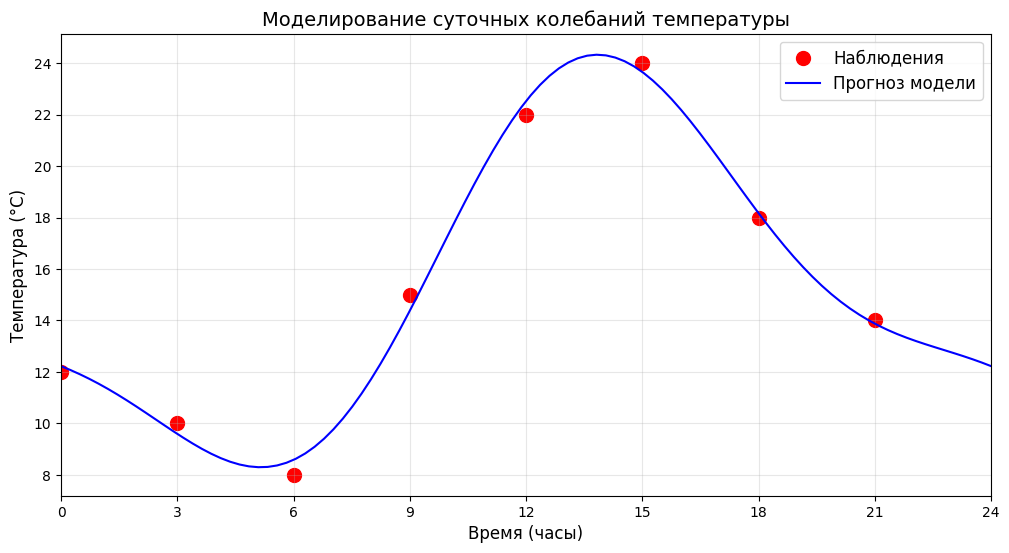

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# 1. Функции для работы с циклическими признаками
def make_cyclic_features(hours, period=24):
    """Создает циклические признаки sin и cos для времени"""
    return np.column_stack([
        np.sin(2 * np.pi * hours / period),
        np.cos(2 * np.pi * hours / period)
    ])

def generate_feature_combinations():
    """Генерирует все возможные комбинации признаков"""
    base_features = ['sin', 'cos', 'sin*cos', 'sin²', 'cos²', 'bias']
    all_combinations = []
    for r in range(1, len(base_features)+1):
        all_combinations.extend(combinations(base_features, r))
    return all_combinations

# 2. Модель и функции обучения
class CyclicModel:
    def __init__(self, feature_combo):
        self.feature_combo = feature_combo
        self.coeffs = None

    def compute_features(self, x_cyclic):
        """Вычисляет матрицу признаков согласно комбинации"""
        features = []
        for term in self.feature_combo:
            if term == 'sin':
                features.append(x_cyclic[:, 0])
            elif term == 'cos':
                features.append(x_cyclic[:, 1])
            elif term == 'sin*cos':
                features.append(x_cyclic[:, 0] * x_cyclic[:, 1])
            elif term == 'sin²':
                features.append(x_cyclic[:, 0]**2)
            elif term == 'cos²':
                features.append(x_cyclic[:, 1]**2)
            elif term == 'bias':
                features.append(np.ones(len(x_cyclic)))
        return np.column_stack(features)

    def predict(self, x_cyclic):
        """Предсказание модели"""
        X = self.compute_features(x_cyclic)
        return X @ self.coeffs

class AdamOptimizer:
    def __init__(self, n_params, lr=0.1, beta1=0.9, beta2=0.999, eps=1e-8):
        self.m = np.zeros(n_params)
        self.v = np.zeros(n_params)
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        self.t = 0

    def step(self, params, grad):
        self.t += 1
        self.m = self.beta1*self.m + (1-self.beta1)*grad
        self.v = self.beta2*self.v + (1-self.beta2)*grad**2
        m_hat = self.m / (1 - self.beta1**self.t)
        v_hat = self.v / (1 - self.beta2**self.t)
        return params - self.lr * m_hat / (np.sqrt(v_hat) + self.eps)

def train_model(x_cyclic, y, feature_combo, epochs=2000, lr=0.1):
    """Обучение модели с заданной комбинацией признаков"""
    model = CyclicModel(feature_combo)
    X = model.compute_features(x_cyclic)
    model.coeffs = np.random.randn(X.shape[1])
    optimizer = AdamOptimizer(len(model.coeffs), lr=lr)

    for _ in range(epochs):
        grad = 2 * X.T @ (X @ model.coeffs - y) / len(y)
        model.coeffs = optimizer.step(model.coeffs, grad)

    y_pred = model.predict(x_cyclic)
    mse = np.mean((y_pred - y)**2)
    return model, mse

# 3. Подготовка данных
hours = np.array([0, 3, 6, 9, 12, 15, 18, 21])
temperature = np.array([12, 10, 8, 15, 22, 24, 18, 14])

# Нормализация температуры
temp_mean, temp_std = temperature.mean(), temperature.std()
y_norm = (temperature - temp_mean) / temp_std

# Создание циклических признаков
x_cyclic = make_cyclic_features(hours)

# 4. Поиск лучшей модели
feature_combinations = generate_feature_combinations()
best_mse = float('inf')
best_model = None
best_combo = None

for combo in feature_combinations:
    model, mse = train_model(x_cyclic, y_norm, combo)
    if mse < best_mse:
        best_mse = mse
        best_model = model
        best_combo = combo

print(f"Лучшая комбинация признаков: {best_combo}")
print(f"Лучший MSE: {best_mse:.6f}")

# 5. Визуализация результатов
plt.figure(figsize=(12, 6))

# Исходные данные
plt.scatter(hours, temperature, c='red', s=100, label='Наблюдения')

# Прогноз на новых данных
new_hours = np.linspace(0, 24, 100)
new_cyclic = make_cyclic_features(new_hours)
pred_norm = best_model.predict(new_cyclic)
predictions = pred_norm * temp_std + temp_mean

plt.plot(new_hours, predictions, 'b-', label='Прогноз модели')

# Настройка графика
plt.xticks(np.arange(0, 25, 3))
plt.xlim(0, 24)
plt.xlabel('Время (часы)', fontsize=12)
plt.ylabel('Температура (°C)', fontsize=12)
plt.title('Моделирование суточных колебаний температуры', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Прогноз в конкретное время
def predict_at_hour(hour):
    cyclic = make_cyclic_features(np.array([hour]))
    pred = best_model.predict(cyclic)[0] * temp_std + temp_mean
    print(f"Прогноз температуры в {hour}:00: {pred:.1f}°C")
    return pred

predict_at_hour(23)  # Пример прогноза на 23:00
predict_at_hour(5)   # Пример прогноза на 5:00

plt.show()